In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('E:/Internship/Restro.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
pip install nltk==3.10 --force-reinstall

Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable


ERROR: Ignored the following yanked versions: 3.6.4
ERROR: Could not find a version that satisfies the requirement nltk==3.10 (from versions: 2.0b8.macosx-10.5-i386, 2.0.1rc1.macosx-10.6-x86_64, 2.0.1rc2-git, 2.0b4, 2.0b5, 2.0b6, 2.0b7, 2.0b8, 2.0b9, 2.0.1rc1, 2.0.1rc3, 2.0.1rc4, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 3.0.0b1, 3.0.0b2, 3.0.0, 3.0.1, 3.0.2, 3.0.3, 3.0.4, 3.0.5, 3.1, 3.2, 3.2.1, 3.2.2, 3.2.3, 3.2.4, 3.2.5, 3.3.0, 3.4, 3.4.1, 3.4.2, 3.4.3, 3.4.4, 3.4.5, 3.5b1, 3.5, 3.6, 3.6.1, 3.6.2, 3.6.3, 3.6.5, 3.6.6, 3.6.7, 3.7, 3.8, 3.8.1)
ERROR: No matching distribution found for nltk==3.10


In [5]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def preprocess_reviews(reviews):
    # Define the set of stop words
    stop_words = set(stopwords.words('english'))
    
    processed_reviews = []
    for review in reviews:
        # Tokenize the review
        tokens = word_tokenize(review.lower())
        
        # Remove stop words and punctuation
        processed_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
        
        processed_reviews.append(processed_tokens)
    
    return processed_reviews


In [9]:
positive_words = ['good', 'great', 'delicious', 'amazing', 'excellent']
negative_words = ['bad', 'terrible', 'awful', 'horrible', 'disappointing']

In [10]:
positive_counts = Counter()
negative_counts = Counter()

In [11]:
processed_reviews = preprocess_reviews(df['Rating text'])
for review in processed_reviews:
    for word in review:
        if word in positive_words:
            positive_counts[word] += 1
        elif word in negative_words:
            negative_counts[word] += 1
print("Most common positive keywords:", positive_counts.most_common(5))
print("Most common negative keywords:", negative_counts.most_common(5))

Most common positive keywords: [('good', 3179), ('excellent', 301)]
Most common negative keywords: []


In [12]:
review_lengths = [len(word_tokenize(review)) for review in df['Rating text']]
average_length = sum(review_lengths) / len(review_lengths)
print("Average review length:", average_length)

Average review length: 1.3378703800649148


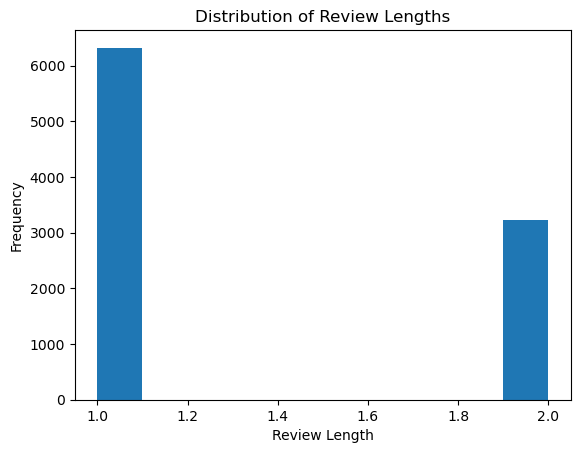

In [13]:
plt.hist(review_lengths, bins=10)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()

In [14]:
#Level3 (task 2)
# Sort by votes in descending order to find restaurants with highest votes
high_votes_rest = df.sort_values('Votes', ascending=False).head()
print(high_votes_rest[['Restaurant Name', 'Votes']])

                Restaurant Name  Votes
728                        Toit  10934
735                    Truffles   9667
3994           Hauz Khas Social   7931
2412                  Peter Cat   7574
739   AB's - Absolute Barbecues   6907


In [15]:
# Sort by votes in ascending order to find restaurants with lowest votes
low_votes_rest = df.sort_values('Votes').head()
print(low_votes_rest[['Restaurant Name', 'Votes']])

                 Restaurant Name  Votes
5799         Khalsa Eating Point      0
7411   Radha Swami Chaat Bhandar      0
7414  Ram Ram Ji Kachori Bhandar      0
7415          Rana's Food Corner      0
7416         Sanjay Chicken Shop      0


In [16]:
correlation = df['Votes'].corr(df['Aggregate rating'])
print("Correlation between votes and rating:", correlation)

Correlation between votes and rating: 0.3136905841954117


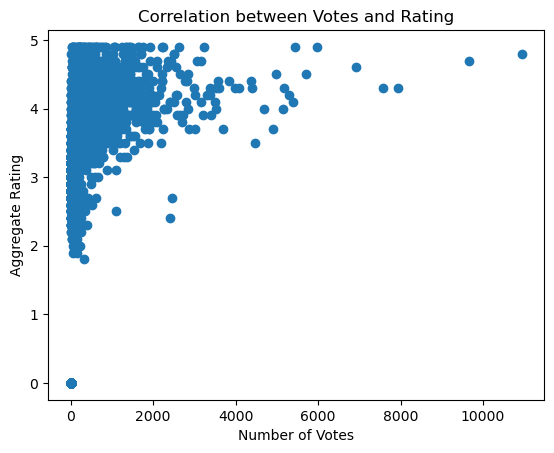

In [17]:
plt.scatter(df['Votes'], df['Aggregate rating'])
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.title('Correlation between Votes and Rating')
plt.show()


In [18]:
#level 3 - task 3 
pd.crosstab(df['Price range'], df['Has Table booking'])

Has Table booking,No,Yes
Price range,,
1,4443,1
2,2874,239
3,764,644
4,312,274


In [19]:
table_booking_crosstab = pd.crosstab(df['Price range'], df['Has Table booking'])
print("\nTable booking by price range:")
print(table_booking_crosstab)

# Group by 'Price range' and count 'Has Online delivery'
delivery_by_price = df.groupby('Price range')['Has Online delivery'].value_counts()
print("\nOnline delivery by price range:")
print(delivery_by_price)

# Group by 'Price range' and count 'Has Table booking'
booking_by_price = df.groupby('Price range')['Has Table booking'].value_counts()
print("\nTable booking by price range:")
print(booking_by_price)


Table booking by price range:
Has Table booking    No  Yes
Price range                 
1                  4443    1
2                  2874  239
3                   764  644
4                   312  274

Online delivery by price range:
Price range  Has Online delivery
1            No                     3743
             Yes                     701
2            No                     1827
             Yes                    1286
3            No                      997
             Yes                     411
4            No                      533
             Yes                      53
Name: count, dtype: int64

Table booking by price range:
Price range  Has Table booking
1            No                   4443
             Yes                     1
2            No                   2874
             Yes                   239
3            No                    764
             Yes                   644
4            No                    312
             Yes                   274
N